In [4]:
import sys
import time
sys.path.append('../core/python')

from commons import inc_inference, adaptive_drilldown, show_heatmap
from imagenet_classes import class_names
from vgg16 import VGG16

ImportError: DLL load failed: The specified module could not be found.

In [2]:
image_file_path = "../images/input/imagenet/dog.jpg"

### Incremental Inference 

In [3]:
#----------------------------------------API Method--------------------------------------#
# model: Class of the CNN model. Currently supports VGG16, ResNet18, and Inception3
# image_file_path: File path of the image on which OBE should be run
# patch_size: Size of the occlusion patch
# stride: Stride value to be used for striding the patch
# beta: Projective field thresholding value. 1.0 means no thresholding
# gpu: Whether to use GPUs or not
# c: value (between 0 and 1) to be used for the occlusion patch. 0 means a black color patch.

begin_time = time.time()
heatmap, prob, label = inc_inference(VGG16, image_file_path, patch_size=16, stride=8, beta=1.0, gpu=True, c=0.0)
end_time = time.time()

NameError: name 'inc_inference' is not defined

In [3]:
print('Predicted Label: %s, Probability: %f, Time: %f s'%(class_names[label], prob, end_time-begin_time))

NameError: name 'class_names' is not defined

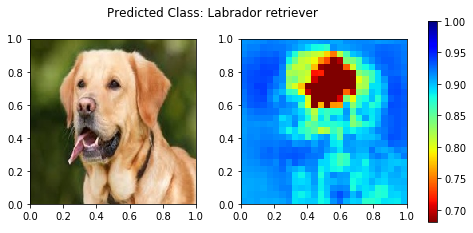

In [59]:
show_heatmap(image_file_path, heatmap, label=class_names[label], prob=prob, width=224)

### TODO: Incremental Inference with Adaptive Drill-Down

In [60]:
#----------------------------------------API Method--------------------------------------#
# model: Class of the CNN model. Currently supports VGG16, ResNet18, and Inception3
# image_file_path: File path of the image on which OBE should be run
# patch_size: Size of the occlusion patch
# stride: Stride value to be used for striding the patch
# r_drill_down: Drill down fraction
# speedup: Required speedup
# beta: Projective field thresholding value. 1.0 means no thresholding
# gpu: Whether to use GPUs or not
# c: value (between 0 and 1) to be used for the occlusion patch. 0 means a black color patch.

# begin_time = time.time()
# heatmap, prob, label = adaptive_drill_down(VGG16, image_file_path, patch_size=32, stride=8, r_drill_down, speedup,
# beta=1.0, gpu=True, c=0.0)
# end_time = time.time()